Files already downloaded and verified
Files already downloaded and verified


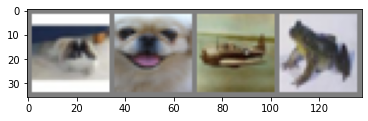

dog   dog   plane frog 


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [17]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.drop=nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [18]:
def acc(n,testloader):

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = n(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    return correct/total

In [19]:

accDroptest=[]
accDrop=[]
net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    accDroptest.append(acc(net,testloader))
    accDrop.append(acc(net,trainloader))
    print('test',accDroptest)
    print('train',accDrop)
print('Finished Training')

[1,  2000] loss: 2.290
[1,  4000] loss: 2.001
[1,  6000] loss: 1.872
[1,  8000] loss: 1.741
[1, 10000] loss: 1.688
[1, 12000] loss: 1.631
Accuracy of the network on the 10000 test images: 38 %
Accuracy of the network on the 10000 test images: 39 %
test [0.3899]
train [0.39004]
[2,  2000] loss: 1.593
[2,  4000] loss: 1.547
[2,  6000] loss: 1.515
[2,  8000] loss: 1.484
[2, 10000] loss: 1.452
[2, 12000] loss: 1.449
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 48 %
test [0.3899, 0.4722]
train [0.39004, 0.48154]
[3,  2000] loss: 1.425
[3,  4000] loss: 1.399
[3,  6000] loss: 1.386
[3,  8000] loss: 1.385
[3, 10000] loss: 1.362
[3, 12000] loss: 1.335
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 52 %
test [0.3899, 0.4722, 0.5135]
train [0.39004, 0.48154, 0.52114]
[4,  2000] loss: 1.299
[4,  4000] loss: 1.317
[4,  6000] loss: 1.330
[4,  8000] loss: 1.294
[4, 10000] loss: 1.326


original without drop

In [15]:
class Neto(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [16]:
acctest= []
acctrain= []
neto = Neto()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(neto.parameters(), lr=0.001, momentum=0.9)


for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = neto(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    
    acctest.append(acc(neto,testloader))
    acctrain.append(acc(neto,trainloader))
    print('test',acctest)
    print('train',acctrain)
print('Finished Training')

[1,  2000] loss: 2.188
[1,  4000] loss: 1.874
[1,  6000] loss: 1.686
[1,  8000] loss: 1.586
[1, 10000] loss: 1.503
[1, 12000] loss: 1.485
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 48 %
test [0.4748]
train [0.48848]
[2,  2000] loss: 1.413
[2,  4000] loss: 1.403
[2,  6000] loss: 1.359
[2,  8000] loss: 1.334
[2, 10000] loss: 1.311
[2, 12000] loss: 1.314
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 55 %
test [0.4748, 0.5344]
train [0.48848, 0.55778]
[3,  2000] loss: 1.227
[3,  4000] loss: 1.227
[3,  6000] loss: 1.233
[3,  8000] loss: 1.213
[3, 10000] loss: 1.213
[3, 12000] loss: 1.183
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 58 %
test [0.4748, 0.5344, 0.5533]
train [0.48848, 0.55778, 0.58462]
[4,  2000] loss: 1.133
[4,  4000] loss: 1.146
[4,  6000] loss: 1.118
[4,  8000] loss: 1.101
[4, 10000] loss: 1.084
